In [92]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from cellpose import io
from cellpose.io import imread
import cv2
from pathlib import Path
import os
import matplotlib as mpl
import Modules
from Modules_Displacement import lefCol, rightCol, botrow, toprow
from Modules import specificOutline, getFileDir, getOutlines
from PIL import Image
from scipy import stats

In [168]:
# List of Files
# Importing all the files
basedir = os.path.join(Path.cwd(), "SingleCellAblation")
files = io.get_image_files(basedir, "")

# Makes the directy to point to the seg files
dir = []
for f in files: 
    dir.append((os.path.join(basedir, f) + "_seg.npy").replace(".png", ""))
dir = dir[3::]

c:\Users\birat\Documents\Internship_Code\SCA_images


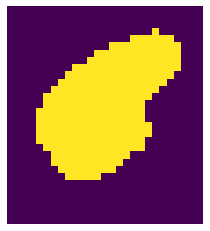

In [169]:
# Code takes the ROI we need and creates png's of it

i = 0 
for i in range(len(dir)):  
    dat = np.load(dir[i], allow_pickle=True).item()
    masks = dat['masks']
    filenam = dat['filename']
    width, height = masks.shape
    neededROI = masks[width//2][height//2]

    newmas = specificOutline(masks, neededROI)
    plt.imshow(newmas)
    filedir = (os.path.join(Path.cwd(), "SCA_images" ))
    nam = str(i) + '.png'
    plt.gca().set_axis_off()
    plt.imsave(os.path.join(filedir, nam), newmas,cmap = 'gray')

print(filedir)

In [170]:
files = io.get_image_files(filedir, "")
imgs = [imread(f) for f in files]
test = imgs[0]
gray = test[:, :, 0]


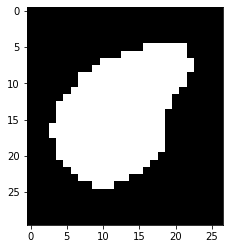

In [134]:
plt.imshow(imgs[6])

In [163]:
def selfGetEdges(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x1, y1 = lefCol(gray)
    x2, y2 = rightCol(gray)
    x3, y3 = toprow(gray)
    x4, y4 = botrow(gray)
    # plt.imshow(gray)
    # plt.scatter(x1, y1, color = 'red')
    # plt.scatter(x2, y2, color = 'green')
    # plt.scatter(y3, x3, color = 'blue')
    # plt.scatter(y4, x4, color = 'purple')
    return x1, y1, x2, y2, x3, y3, x4, y4


In [136]:
def getEdges(test): 
    img_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    image_copy = img_gray.copy()
    img = cv2.cvtColor(image_copy, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color= (0, 255, 0), thickness=0, lineType=cv2.LINE_AA)

    c = max(contours, key=cv2.contourArea)

    # Obtain outer coordinates
    l1, l2 = tuple(c[c[:, :, 0].argmin()][0])
    r1, r2 = tuple(c[c[:, :, 0].argmax()][0])
    t1, t2 = tuple(c[c[:, :, 1].argmin()][0])
    b1, b2 = tuple(c[c[:, :, 1].argmax()][0])
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.scatter(l1, l2)
    # plt.scatter(r1, r2)
    # plt.scatter(t1, t2)
    # plt.scatter(b1, b2)
    return l1, l2, r1, r2, t1, t2, b1, b2

def GetDisplacement(e1, e2): 
    dis = []
    for i in range(len(e1) - 1): 
        dis.append(np.sqrt((e1[i] - e1[i + 1])**2 + (e2[i] - e2[i+1])**2))
        
    return dis


In [182]:
def stuff(imgs):
    a = []
    for i in range(55):
        a.append(getEdges(imgs[i]))
    return a

a = stuff(imgs)
a = np.asarray(a)
L1 = L2 = R1= R2= T1= T2= B1= B2 = np.zeros(99)
a
L1 = a[:, 0]
L2 = a[:, 1]
R1 = a[:, 2]
R2 = a[:, 3]
T1 = a[:, 4]
T2 = a[:, 5]
B1 = a[:, 6]
B2 = a[:, 7]

In [185]:
LD = GetDisplacement(L1, L2)
RD = GetDisplacement(R1, R2) 
TD = GetDisplacement(T1, T2)
BD = GetDisplacement(B1, B2)

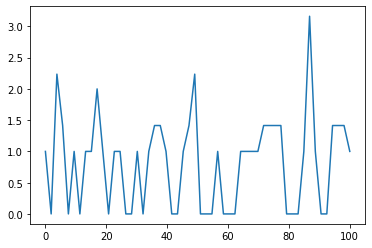

In [189]:
x = np.linspace(0, 100, len(LD))
plt.plot(x, RD)

1

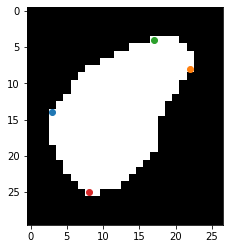

In [10]:
l1, l2, r1, r2, b1, b2, t1, t2= getEdges(imgs[0])
plt.imshow(imgs[0])
plt.scatter(l1, l2)
plt.scatter(r1, r2)
plt.scatter(b1, b2)
plt.scatter(t1, t2)